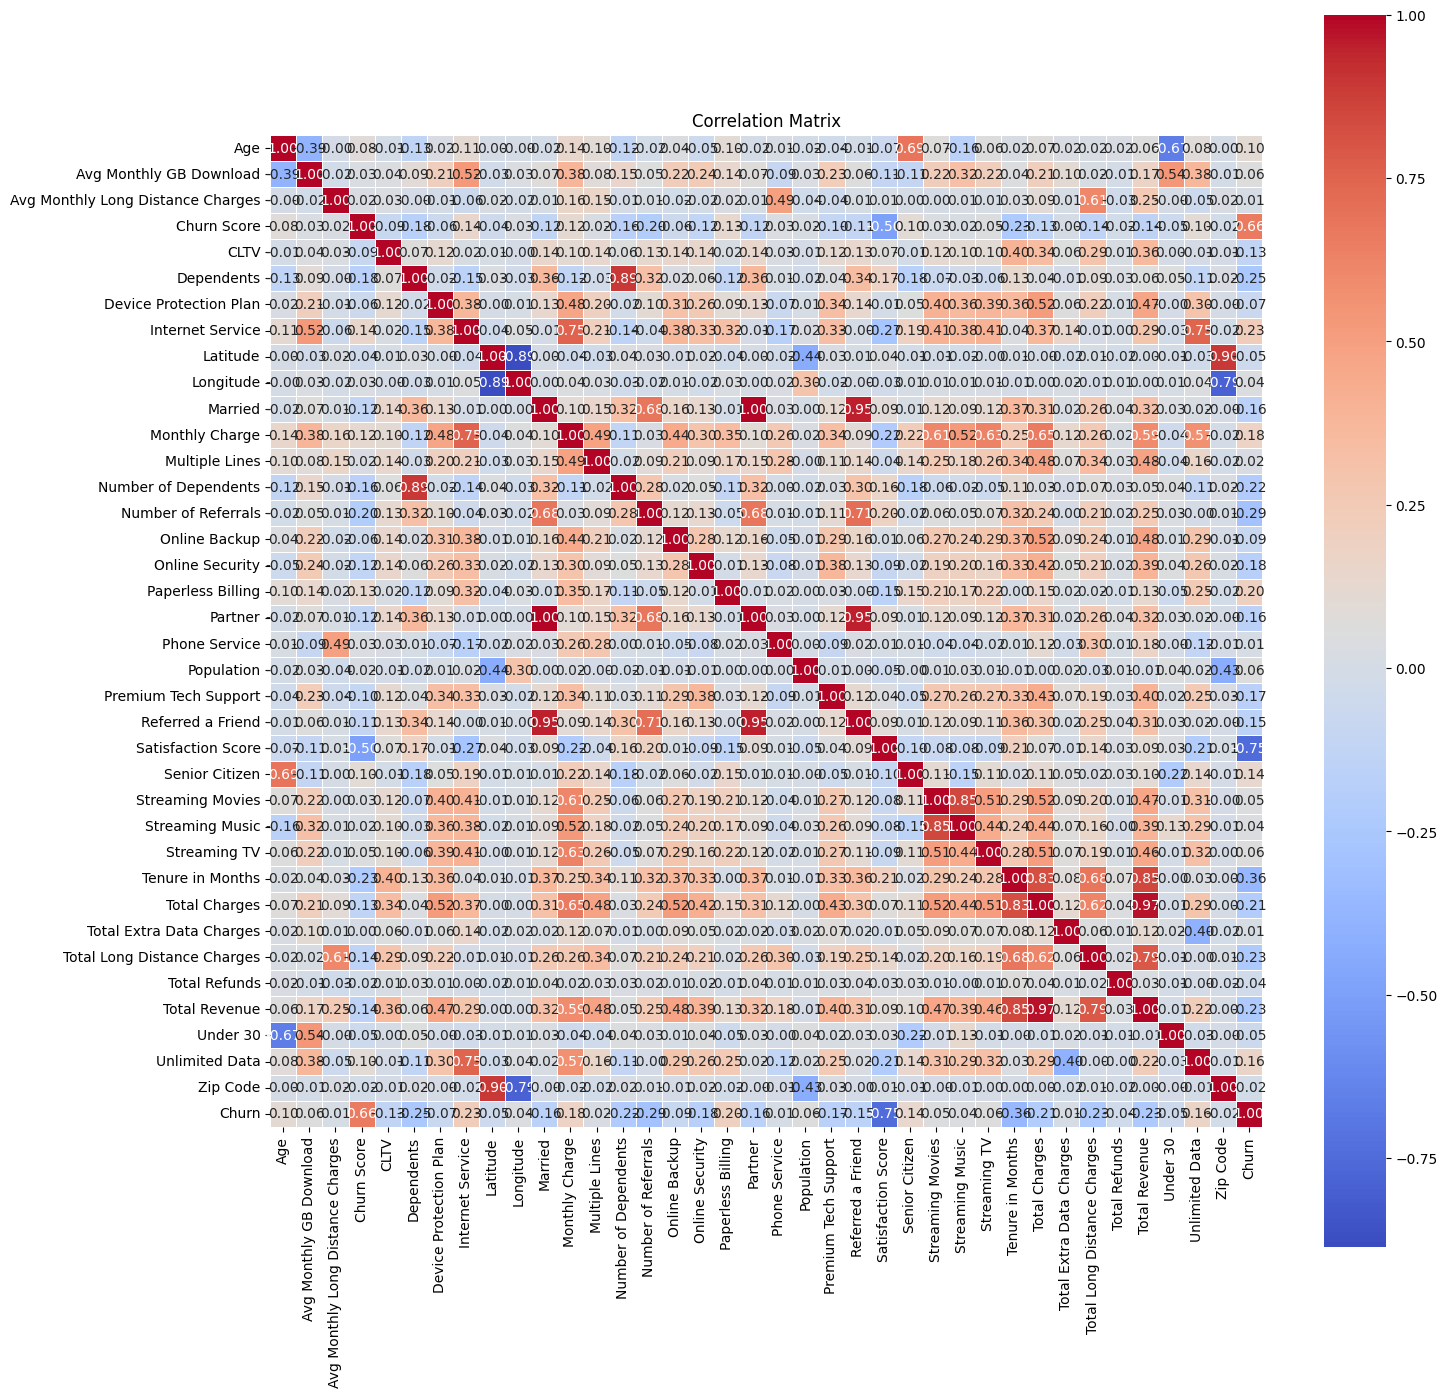

In [98]:
#top highest corelation features with target variable 'Churn'
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('train.csv')
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',square=True,linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [99]:
# identifying top features correlated with 'Churn'
corr_target = corr_matrix['Churn'].abs()
top_features = corr_target[corr_target >= 0.30].index.tolist()
print("Top features correlated with 'Churn':", top_features)

# selecting only the top features from the original dataframe
df_selected = df[top_features]
print(df_selected.head())


Top features correlated with 'Churn': ['Churn Score', 'Satisfaction Score', 'Tenure in Months', 'Churn']
   Churn Score  Satisfaction Score  Tenure in Months  Churn
0           51                   3                25      0
1           27                   3                35      0
2           59                   5                46      0
3           49                   4                27      0
4           88                   2                58      1


In [100]:
# check data imblance in target variable
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
0    3104
1    1121
Name: count, dtype: int64


In [101]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x = df_selected.drop('Churn', axis=1)
y = df_selected['Churn']

train = df_selected.copy()

df_test = pd.read_csv('test.csv')
df_selected_test = df_test[top_features]

x_train = train.drop('Churn', axis=1)
y_train = train['Churn']

x_test = df_selected_test.drop('Churn', axis=1)
y_test = df_selected_test['Churn']

x_train_scaled = scaler.fit_transform(x_train)
X_test_scaled  = scaler.transform(x_test)

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train)
print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {} \n".format(sum(y_train_res==0)))

After SMOTE, counts of label '1': 3104
After SMOTE, counts of label '0': 3104 



In [102]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
df_encoded[categorical_cols] = encoder.fit_transform(df_encoded[categorical_cols])
df_encoded.fillna(0, inplace=True)
df_encoded

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,Customer ID,Customer Status,Dependents,Device Protection Plan,Gender,Internet Service,Internet Type,Lat Long,Latitude,Longitude,Married,Monthly Charge,Multiple Lines,Number of Dependents,Number of Referrals,Offer,Online Backup,Online Security,Paperless Billing,Partner,Payment Method,Phone Service,Population,Premium Tech Support,Quarter,Referred a Friend,Satisfaction Score,Senior Citizen,State,Streaming Movies,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,0.0,0.0,51,853.0,4849,2.0,0.0,1911.0,2.0,0,1,0.0,1,2.0,985.0,37.538309,-122.305109,1,88.40,0,0,1,0.0,1,0,0,1,0.0,1,37926,0,0.0,1,3,1,0.0,1,1,0,25,2191.15,0,486.00,0.00,2677.15,0,1,94403,0
1,27,59,45.62,0.0,0.0,27,955.0,3715,0.0,0.0,2274.0,2.0,0,1,1.0,1,2.0,1248.0,38.432145,-120.770690,0,95.50,1,0,0,0.0,0,0,0,0,0.0,1,4610,1,0.0,0,3,0,0.0,0,0,1,35,3418.20,0,1596.70,0.00,5014.90,1,1,95685,0
2,59,0,16.07,0.0,0.0,59,867.0,5092,0.0,0.0,2351.0,2.0,0,0,1.0,0,0.0,862.0,37.007882,-122.065975,1,19.60,0,0,3,0.0,0,0,0,1,0.0,1,4563,0,0.0,1,5,0,0.0,0,0,0,46,851.20,0,739.22,0.00,1590.42,0,0,95064,0
3,25,27,0.00,0.0,0.0,49,109.0,2068,1.0,0.0,915.0,2.0,0,1,1.0,1,1.0,328.0,33.924143,-117.793870,1,45.85,0,0,3,0.0,1,0,1,1,1.0,0,1408,0,0.0,1,4,0,0.0,1,1,0,27,1246.40,30,0.00,0.00,1276.40,1,0,92823,0
4,31,21,17.22,2.0,14.0,88,843.0,4026,1.0,0.0,144.0,0.0,0,1,1.0,1,0.0,915.0,37.311088,-121.961786,1,60.30,0,0,1,1.0,1,1,0,1,1.0,1,29914,0,0.0,1,2,0,0.0,0,0,0,58,3563.80,0,998.76,0.00,4562.56,0,1,95117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,36,0,7.76,0.0,0.0,52,535.0,4590,0.0,0.0,985.0,1.0,0,0,1.0,0,0.0,248.0,33.802664,-118.179971,0,19.90,0,0,0,0.0,0,0,1,0,1.0,1,49647,0,0.0,0,3,0,0.0,0,0,0,1,19.90,0,7.76,0.00,27.66,0,0,90806,0
4221,77,22,23.43,0.0,0.0,34,837.0,5602,1.0,0.0,2063.0,2.0,0,0,0.0,1,2.0,1042.0,37.736535,-122.457320,0,81.70,0,0,0,0.0,1,1,0,0,0.0,1,20643,0,0.0,0,4,1,0.0,0,0,0,22,1820.90,0,515.46,29.88,2306.48,0,1,94127,0
4222,56,0,28.06,0.0,0.0,63,683.0,4458,1.0,0.0,349.0,2.0,1,0,1.0,0,0.0,1399.0,39.082568,-121.553250,1,20.05,0,3,1,3.0,0,0,0,1,0.0,1,6439,0,0.0,1,5,0,0.0,0,0,0,18,345.90,0,505.08,0.00,850.98,0,0,95961,0
4223,45,22,0.00,0.0,0.0,38,1043.0,4115,0.0,0.0,282.0,2.0,0,1,0.0,1,0.0,500.0,34.130992,-118.894673,1,58.75,0,0,1,1.0,1,1,1,1,0.0,0,18735,0,0.0,1,3,0,0.0,1,1,1,57,3437.45,0,0.00,0.00,3437.45,0,1,91361,0


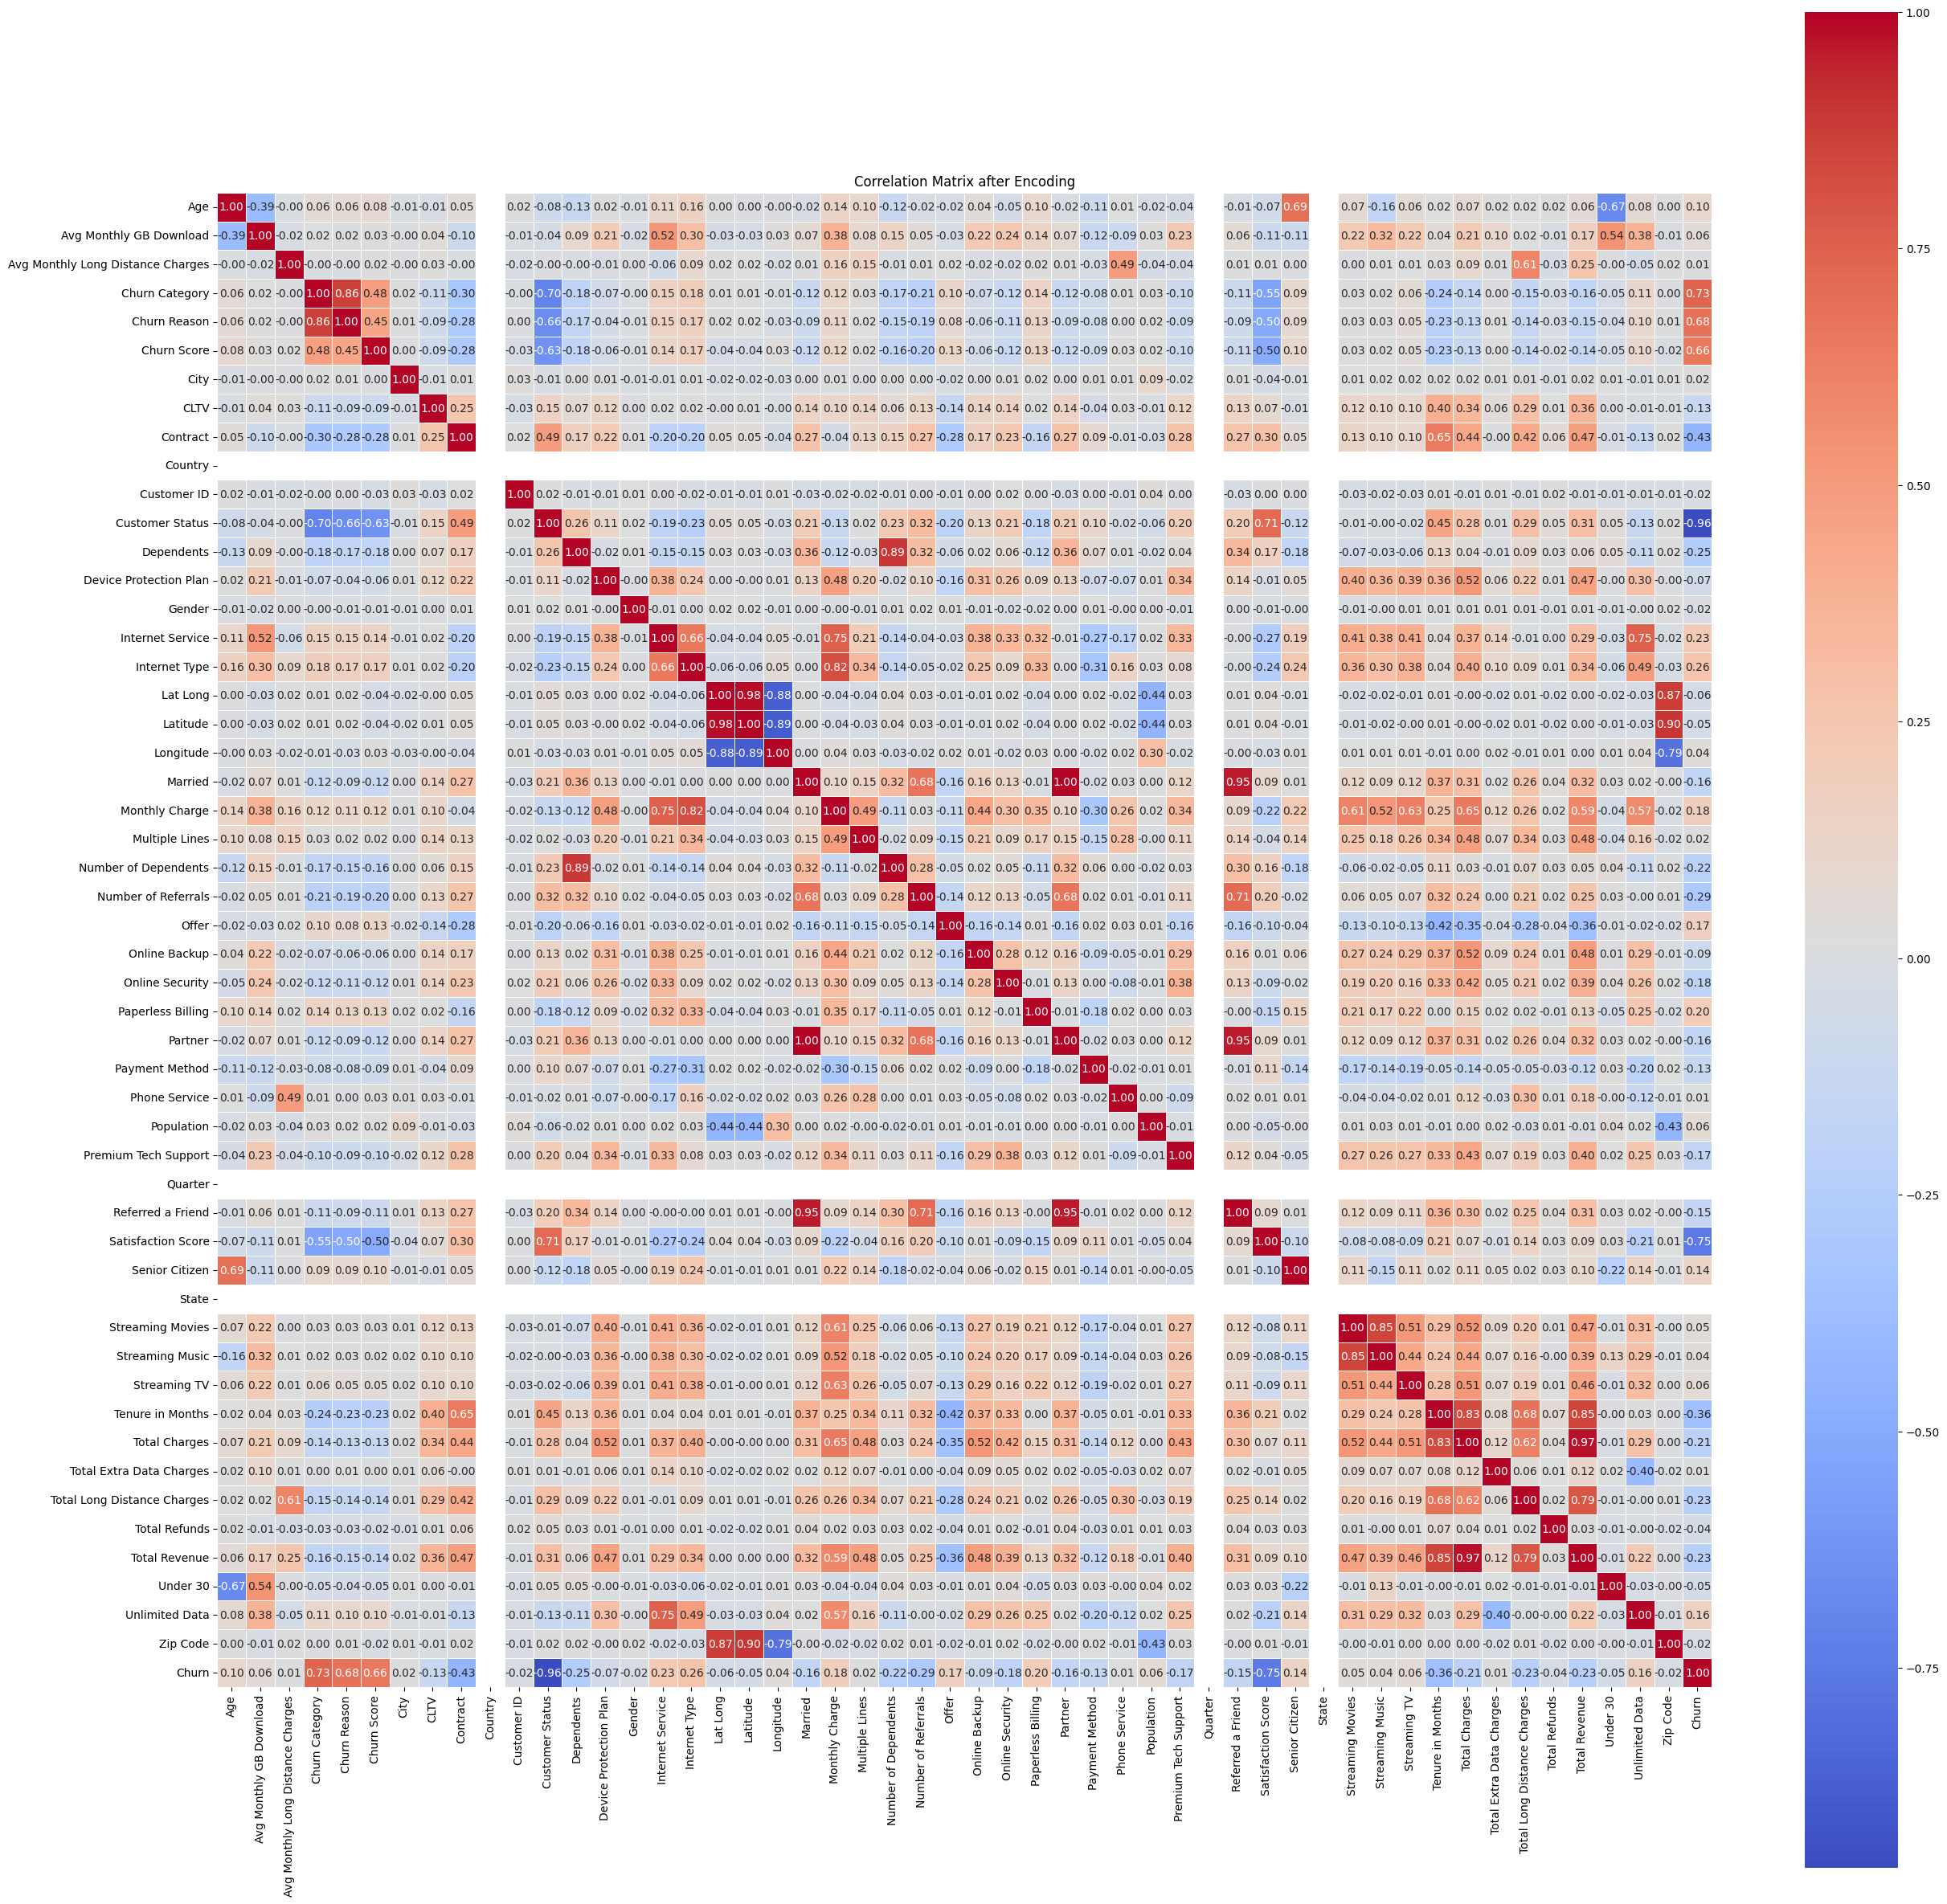

In [103]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm',square=True,linewidths=.5)
plt.title('Correlation Matrix after Encoding')
plt.show()

In [104]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10) 
X_new = selector.fit_transform(df_encoded.drop('Churn', axis=1), df_encoded['Churn'])
selected_features = df_encoded.drop('Churn', axis=1).columns[selector.get_support()]
print("Top 10 cofeatures selected:", selected_features)

Top 10 cofeatures selected: Index(['Churn Category', 'Churn Reason', 'Churn Score', 'Contract',
       'Customer Status', 'Dependents', 'Internet Type', 'Number of Referrals',
       'Satisfaction Score', 'Tenure in Months'],
      dtype='object')


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 9 34 38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [105]:
corr_target = df_encoded.corr()['Churn'].abs()
top_features = corr_target[corr_target >= 0.30].index.tolist()
print("Top features correlated with 'Churn':", top_features)


Top features correlated with 'Churn': ['Churn Category', 'Churn Reason', 'Churn Score', 'Contract', 'Customer Status', 'Satisfaction Score', 'Tenure in Months', 'Churn']


In [106]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(df_encoded.drop('Churn', axis=1), df_encoded['Churn'])
feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
print("Feature ranking based on Random Forest importance:")
for idx in sorted_indices:
    print(f"{df_encoded.drop('Churn', axis=1).columns[idx]}: {feature_importances[idx]:.4f}")

Feature ranking based on Random Forest importance:
Customer Status: 0.2560
Churn Reason: 0.2397
Churn Category: 0.1941
Satisfaction Score: 0.1345
Churn Score: 0.0838
Contract: 0.0222
Number of Referrals: 0.0103
Internet Type: 0.0098
Tenure in Months: 0.0064
Total Charges: 0.0062
Total Revenue: 0.0049
Number of Dependents: 0.0043
Total Long Distance Charges: 0.0039
Monthly Charge: 0.0027
Online Security: 0.0018
Offer: 0.0016
Unlimited Data: 0.0014
Avg Monthly GB Download: 0.0013
Age: 0.0013
CLTV: 0.0012
Paperless Billing: 0.0011
Internet Service: 0.0011
Latitude: 0.0010
Dependents: 0.0009
City: 0.0009
Longitude: 0.0008
Avg Monthly Long Distance Charges: 0.0008
Zip Code: 0.0007
Customer ID: 0.0007
Payment Method: 0.0007
Population: 0.0007
Lat Long: 0.0005
Senior Citizen: 0.0005
Premium Tech Support: 0.0004
Married: 0.0004
Streaming Movies: 0.0003
Gender: 0.0002
Online Backup: 0.0002
Total Extra Data Charges: 0.0001
Streaming Music: 0.0001
Referred a Friend: 0.0001
Multiple Lines: 0.0001
